In [32]:
from pathlib import Path
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

csv_dir = Path('../csvs')

In [71]:
all_sites_metrics = pd.read_csv(csv_dir / "site_representative_metrics.csv")
all_sites_metrics = all_sites_metrics.set_index('site')
all_sites_metrics['site_type'] = all_sites_metrics.index.str[0:3]
all_sites_metrics

,mean__chm,max__chm,mean__veg_height_q30,mean__canopy_cover_gt1m,mean__fhd,mean__veg_height_cv,mean__vci,mean__crr,mean__veg_height_kurt,sd__chm,cv__chm,sd__canopy_cover_gt1m,sd__vci,sd__fhd,sd__crr,sd__veg_height_skew,site_type
site,,,,,,,,,,,,,,,,,
EPO_O_04,38.239886,52.3364,11.945576,0.868069,2.177094,0.620750,0.546357,0.563695,0.187544,13.330358,0.348752,0.125496,0.114871,0.457687,0.167676,1.283775,EPO
EPO_O_13,27.299484,38.0424,11.010423,0.685449,1.972776,0.661154,0.536631,0.590778,0.207591,6.769295,0.246819,0.203709,0.141558,0.520719,0.175375,1.208187,EPO
EPO_Y_10,25.902798,32.9526,12.544017,0.652079,2.086827,0.640253,0.588872,0.611869,0.399777,5.477748,0.214736,0.193605,0.152311,0.538408,0.150632,1.099697,EPO
EPO_Y_15,19.754897,26.8930,5.932556,0.774936,2.093690,0.693868,0.624400,0.534772,-0.691528,4.028354,0.204997,0.144095,0.103413,0.346978,0.142027,0.930350,EPO
EPO_Y_36,14.125612,20.8292,4.015971,0.684135,1.622504,0.758431,0.523706,0.520444,-0.234955,4.098733,0.295683,0.197953,0.139617,0.430635,0.160847,1.122658,EPO
EPO_Y_37,19.546503,29.8392,6.103131,0.900535,2.201588,0.601493,0.638667,0.518785,-0.231919,5.400514,0.284503,0.104405,0.102920,0.354001,0.131940,0.901474,EPO
EPY_O_01,24.300720,30.3114,16.589948,0.723886,2.102990,0.394931,0.608015,0.732646,2.615524,3.348425,0.137875,0.161273,0.132946,0.459745,0.128598,1.109719,EPY
EPY_O_07,19.011238,26.9406,9.426508,0.723917,2.326841,0.459757,0.694907,0.623439,-0.267701,3.608839,0.193783,0.120105,0.117699,0.392896,0.115948,0.733684,EPY
EPY_O_09,16.115101,22.3550,11.017379,0.624741,1.597490,0.379940,0.500202,0.740153,1.688820,3.817097,0.236906,0.190139,0.134313,0.429018,0.153667,1.239037,EPY


In [72]:
all_plots_metrics = pd.read_csv(csv_dir / "plot_representative_metrics.csv")
all_plots_metrics = all_plots_metrics.set_index('id')
all_plots_metrics

,site,mean__chm,max__chm,mean__veg_height_q30,mean__canopy_cover_gt1m,mean__fhd,mean__veg_height_cv,mean__vci,mean__crr,mean__veg_height_kurt,sd__chm,cv__chm,sd__canopy_cover_gt1m,sd__vci,sd__fhd,sd__crr,sd__veg_height_skew
id,,,,,,,,,,,,,,,,,
AGG_O_01_P1,AGG_O_01,9.104318,16.276,3.608292,0.563681,1.716545,0.629295,0.593884,0.555466,-0.295746,3.039098,0.333808,0.206063,0.155163,0.448478,0.132860,0.870518
AGG_O_01_P2,AGG_O_01,9.143720,17.180,4.114914,0.579256,1.706308,0.566791,0.579502,0.587945,-0.204057,2.943623,0.321928,0.207027,0.166974,0.491646,0.129502,0.772531
AGG_O_01_P3,AGG_O_01,10.808279,21.463,4.482414,0.631519,1.844224,0.607386,0.456147,0.566187,-0.226870,2.920032,0.270166,0.189898,0.100575,0.406628,0.135061,0.886172
AGG_O_01_P4,AGG_O_01,26.233368,65.734,8.552811,0.770334,2.015243,0.675599,0.479284,0.515107,0.353507,19.107834,0.728379,0.227290,0.134553,0.565755,0.169970,1.181471
AGG_O_01_P5,AGG_O_01,33.688303,73.597,13.305916,0.819641,2.245093,0.576981,0.520000,0.559599,0.383881,19.933778,0.591712,0.182743,0.115756,0.499773,0.159767,1.086882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ULY_Y_96_P1,ULY_Y_96,8.352560,23.539,3.008736,0.505467,1.354531,0.683211,0.415743,0.509003,0.652704,5.543308,0.663666,0.349325,0.197820,0.644517,0.193448,1.282089
ULY_Y_96_P2,ULY_Y_96,6.701582,29.473,1.630950,0.349552,1.070607,0.744658,0.311768,0.460762,0.613761,7.097442,1.059070,0.317186,0.193562,0.664690,0.173012,1.180520
ULY_Y_96_P3,ULY_Y_96,4.673009,25.916,0.897068,0.376699,1.024145,0.706706,0.310739,0.441329,0.830103,4.603342,0.985092,0.291885,0.166877,0.549998,0.164585,1.100349


# 1. CASE STUDY

In [120]:
study_site_types = ('NRO', 'ULO', 'ULM', 'ULY')

In [121]:
study_sites = all_sites_metrics[all_sites_metrics['site_type'].isin(study_site_types)]
study_sites

,mean__chm,max__chm,mean__veg_height_q30,mean__canopy_cover_gt1m,mean__fhd,mean__veg_height_cv,mean__vci,mean__crr,mean__veg_height_kurt,sd__chm,cv__chm,sd__canopy_cover_gt1m,sd__vci,sd__fhd,sd__crr,sd__veg_height_skew,site_type
site,,,,,,,,,,,,,,,,,
NRO_138,27.369721,43.7700,10.508378,0.847834,2.218066,0.527901,0.582349,0.584191,-0.140781,7.470345,0.275386,0.109669,0.105979,0.403612,0.131919,0.965233,NRO
NRO_174,21.757273,35.7046,8.919786,0.924231,2.196258,0.491970,0.606018,0.601454,-0.723778,3.857750,0.177105,0.069600,0.083656,0.303280,0.103260,0.660909,NRO
NRO_190,29.206860,43.4346,13.948580,0.951621,2.274627,0.423661,0.596681,0.651538,-0.142454,6.485604,0.221705,0.058524,0.105572,0.402816,0.110221,0.885765,NRO
NRO_52,32.009452,52.3000,12.475994,0.903800,1.881607,0.621762,0.470569,0.586429,0.447948,11.851256,0.376098,0.136532,0.127213,0.508441,0.184457,1.326217,NRO
NRO_O_56,32.526741,46.0990,14.499455,0.927315,2.055886,0.526352,0.531228,0.634192,0.038842,7.301614,0.222727,0.093419,0.106001,0.411756,0.146002,1.079995,NRO
NRO_Y_82,21.571733,45.3626,8.451736,0.893320,2.176068,0.535951,0.562322,0.594887,-0.789654,4.979545,0.233034,0.125744,0.091921,0.354793,0.114596,0.730816,NRO
ULM_147,49.118621,79.8704,21.584595,0.927847,2.187851,0.554334,0.497091,0.606428,0.837654,22.266816,0.464693,0.121050,0.120913,0.532234,0.179879,1.351271,ULM
ULM_27,23.640164,50.9246,11.468868,0.853902,1.983064,0.474949,0.501446,0.642486,0.402965,12.082791,0.509178,0.168457,0.130051,0.514664,0.149728,1.063762,ULM
ULM_310,27.153579,54.2058,10.221095,0.862755,2.076267,0.596827,0.516628,0.553503,0.404399,14.335195,0.531888,0.165676,0.110552,0.444985,0.179611,1.189157,ULM


## PCA

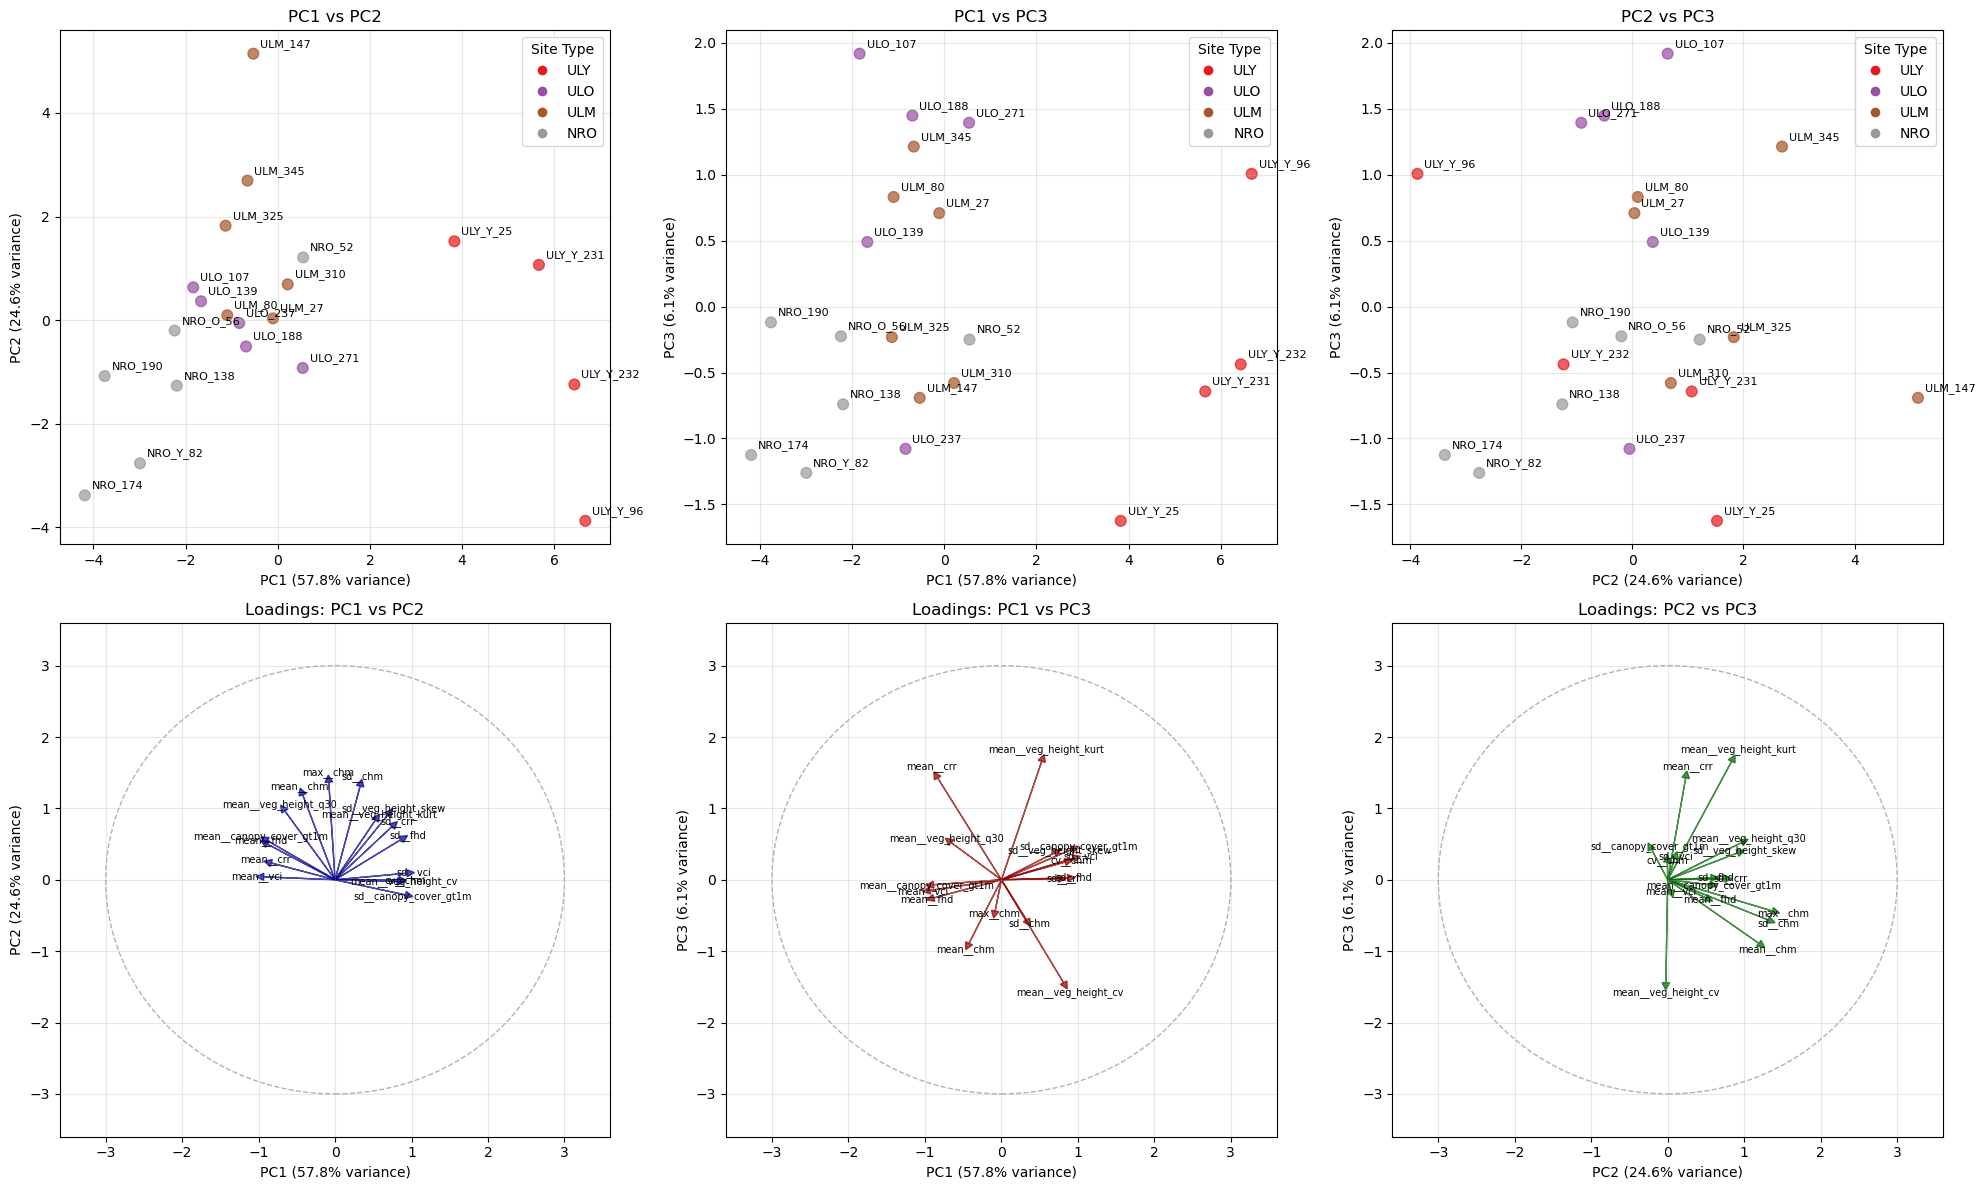

In [122]:
# Take just the numeric values for site types
site_metrics = study_sites.drop(columns=['site_type'])

# Scale and center the metrics
scaler = StandardScaler()
scaled_metrics = scaler.fit_transform(site_metrics)

n = 3

pca = PCA(n_components=n)
pca.fit(scaled_metrics)
pca_scores = pca.transform(scaled_metrics)


pca_scores_df = pd.DataFrame(
    pca_scores,
    columns=pca.get_feature_names_out(),
    index=site_metrics.index
)

pca_loadings_df = pd.DataFrame(pca.components_.T, columns=pca.get_feature_names_out(), index=site_metrics.columns)
pca_loadings_df.index.name = 'metric'

import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting style
plt.style.use('default')
sns.set_palette("husl")

# Create a figure with multiple subplots
fig = plt.figure(figsize=(20, 12))

# Color code by site type 
site_types = [site[:3] for site in pca_scores_df.index]
unique_site_types = list(set(site_types))
# Use a color palette that automatically assigns colors
color_palette = plt.cm.Set1(np.linspace(0, 1, len(unique_site_types)))
colors = dict(zip(unique_site_types, color_palette))
site_colors = [colors[site_type] for site_type in site_types]

# Create legend elements (will be reused)
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[site_type], 
                         markersize=8, label=site_type) for site_type in unique_site_types]

# 1. PC1 vs PC2
ax1 = plt.subplot(2, 3, 1)
scatter1 = ax1.scatter(pca_scores_df['pca0'], pca_scores_df['pca1'], 
                      c=site_colors, s=60, alpha=0.7)

# Add site labels
for i, site in enumerate(pca_scores_df.index):
    ax1.annotate(site, (pca_scores_df['pca0'].iloc[i], pca_scores_df['pca1'].iloc[i]), 
                xytext=(5, 5), textcoords='offset points', fontsize=8)

ax1.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
ax1.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)')
ax1.set_title('PC1 vs PC2')
ax1.grid(True, alpha=0.3)
ax1.legend(handles=legend_elements, title='Site Type', loc='best')

# 2. PC1 vs PC3
ax2 = plt.subplot(2, 3, 2)
scatter2 = ax2.scatter(pca_scores_df['pca0'], pca_scores_df['pca2'], 
                      c=site_colors, s=60, alpha=0.7)

# Add site labels
for i, site in enumerate(pca_scores_df.index):
    ax2.annotate(site, (pca_scores_df['pca0'].iloc[i], pca_scores_df['pca2'].iloc[i]), 
                xytext=(5, 5), textcoords='offset points', fontsize=8)

ax2.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
ax2.set_ylabel(f'PC3 ({pca.explained_variance_ratio_[2]:.1%} variance)')
ax2.set_title('PC1 vs PC3')
ax2.grid(True, alpha=0.3)
ax2.legend(handles=legend_elements, title='Site Type', loc='best')

# 3. PC2 vs PC3
ax3 = plt.subplot(2, 3, 3)
scatter3 = ax3.scatter(pca_scores_df['pca1'], pca_scores_df['pca2'], 
                      c=site_colors, s=60, alpha=0.7)

# Add site labels
for i, site in enumerate(pca_scores_df.index):
    ax3.annotate(site, (pca_scores_df['pca1'].iloc[i], pca_scores_df['pca2'].iloc[i]), 
                xytext=(5, 5), textcoords='offset points', fontsize=8)

ax3.set_xlabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)')
ax3.set_ylabel(f'PC3 ({pca.explained_variance_ratio_[2]:.1%} variance)')
ax3.set_title('PC2 vs PC3')
ax3.grid(True, alpha=0.3)
ax3.legend(handles=legend_elements, title='Site Type', loc='best')

# Loading vectors plots
# Scale the loadings for better visualization
loading_scale = 3  # Adjust this to make arrows more visible

# 4. Loading vectors: PC1 vs PC2
ax4 = plt.subplot(2, 3, 4)
for i, (metric, loadings) in enumerate(pca_loadings_df.iterrows()):
    ax4.arrow(0, 0, loadings['pca0'] * loading_scale, loadings['pca1'] * loading_scale, 
              head_width=0.1, head_length=0.1, fc='darkblue', ec='darkblue', alpha=0.7)
    # Add metric labels at the end of arrows
    ax4.text(loadings['pca0'] * loading_scale * 1.1, loadings['pca1'] * loading_scale * 1.1, 
             metric, fontsize=7, ha='center', va='center')

ax4.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
ax4.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)')
ax4.set_title('Loadings: PC1 vs PC2')
ax4.grid(True, alpha=0.3)
ax4.set_xlim(-loading_scale*1.2, loading_scale*1.2)
ax4.set_ylim(-loading_scale*1.2, loading_scale*1.2)

# Add a circle to show unit loading
circle1 = plt.Circle((0, 0), loading_scale, fill=False, linestyle='--', alpha=0.3)
ax4.add_patch(circle1)

# 5. Loading vectors: PC1 vs PC3
ax5 = plt.subplot(2, 3, 5)
for i, (metric, loadings) in enumerate(pca_loadings_df.iterrows()):
    ax5.arrow(0, 0, loadings['pca0'] * loading_scale, loadings['pca2'] * loading_scale, 
              head_width=0.1, head_length=0.1, fc='darkred', ec='darkred', alpha=0.7)
    # Add metric labels at the end of arrows
    ax5.text(loadings['pca0'] * loading_scale * 1.1, loadings['pca2'] * loading_scale * 1.1, 
             metric, fontsize=7, ha='center', va='center')

ax5.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
ax5.set_ylabel(f'PC3 ({pca.explained_variance_ratio_[2]:.1%} variance)')
ax5.set_title('Loadings: PC1 vs PC3')
ax5.grid(True, alpha=0.3)
ax5.set_xlim(-loading_scale*1.2, loading_scale*1.2)
ax5.set_ylim(-loading_scale*1.2, loading_scale*1.2)

# Add a circle to show unit loading
circle2 = plt.Circle((0, 0), loading_scale, fill=False, linestyle='--', alpha=0.3)
ax5.add_patch(circle2)

# 6. Loading vectors: PC2 vs PC3
ax6 = plt.subplot(2, 3, 6)
for i, (metric, loadings) in enumerate(pca_loadings_df.iterrows()):
    ax6.arrow(0, 0, loadings['pca1'] * loading_scale, loadings['pca2'] * loading_scale, 
              head_width=0.1, head_length=0.1, fc='darkgreen', ec='darkgreen', alpha=0.7)
    # Add metric labels at the end of arrows
    ax6.text(loadings['pca1'] * loading_scale * 1.1, loadings['pca2'] * loading_scale * 1.1, 
             metric, fontsize=7, ha='center', va='center')

ax6.set_xlabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)')
ax6.set_ylabel(f'PC3 ({pca.explained_variance_ratio_[2]:.1%} variance)')
ax6.set_title('Loadings: PC2 vs PC3')
ax6.grid(True, alpha=0.3)
ax6.set_xlim(-loading_scale*1.2, loading_scale*1.2)
ax6.set_ylim(-loading_scale*1.2, loading_scale*1.2)

# Add a circle to show unit loading
circle3 = plt.Circle((0, 0), loading_scale, fill=False, linestyle='--', alpha=0.3)
ax6.add_patch(circle3)

plt.tight_layout()
plt.show()


## Analysis of Variance

In [123]:
from scipy.spatial.distance import pdist, squareform
from sklearn.preprocessing import StandardScaler

from skbio.stats.distance import permanova
from skbio import DistanceMatrix

In [124]:
def get_p_val_group(p_val: float):
    if p_val < 0.001:
        significant = 'highly significant (p < 0.001)'
    elif p_val < 0.01:
        significant = 'very significant (p < 0.01)'
    elif p_val < 0.05:
        significant = 'significant (p < 0.05)'
    else:
        significant = 'not significant (p >= 0.05)'  # Fixed: was 0.5, should be 0.05
    return significant

In [125]:
y = study_sites['site_type']

distances = pdist(scaled_metrics, metric='euclidean')
distance_matrix = DistanceMatrix(squareform(distances), ids=site_metrics.index)

result = permanova(distance_matrix, y, permutations=9999)

print(f'Full PERMANOVA is {get_p_val_group(result['p-value'])}')

result

Full PERMANOVA is highly significant (p < 0.001)


method name               PERMANOVA
test statistic name        pseudo-F
sample size                      21
number of groups                  4
test statistic             9.947088
p-value                      0.0001
number of permutations         9999
Name: PERMANOVA results, dtype: object

## Pairwise PERMANOVA

Since the overall PERMANOVA is significant, we can perform pairwise comparisons between site types to identify which pairs differ significantly.

In [126]:
from itertools import combinations
from statsmodels.stats.multitest import multipletests
import pandas as pd

def pairwise_permanova(distance_matrix, grouping, permutations=9999, method='holm'):
    """
    Perform pairwise PERMANOVA tests between all pairs of groups.
    
    Parameters:
    -----------
    distance_matrix : skbio.DistanceMatrix
        Distance matrix for the samples
    grouping : pandas.Series
        Group labels for each sample
    permutations : int
        Number of permutations for each test
    method : str
        Multiple testing correction method (default: 'holm')
    
    Returns:
    --------
    pandas.DataFrame
        Results table with pairwise comparisons and corrected p-values
    """
    unique_groups = grouping.unique()
    results = []
    
    # Perform pairwise tests
    for group1, group2 in combinations(unique_groups, 2):
        # Get indices for the two groups
        mask = grouping.isin([group1, group2])
        subset_ids = grouping[mask].index
        
        # Create subset distance matrix
        subset_dm = distance_matrix.filter(subset_ids)
        subset_grouping = grouping[mask]
        
        # Run PERMANOVA
        pairwise_result = permanova(subset_dm, subset_grouping, permutations=permutations)
        
        results.append({
            'Group1': group1,
            'Group2': group2,
            'F-statistic': pairwise_result['test statistic'],
            'p-value': pairwise_result['p-value'],
            'n_Group1': (subset_grouping == group1).sum(),
            'n_Group2': (subset_grouping == group2).sum()
        })
    
    # Convert to DataFrame
    results_df = pd.DataFrame(results)
    
    # Apply multiple testing correction
    if len(results_df) > 1:
        corrected_p = multipletests(results_df['p-value'], method=method)
        results_df[f'p-value_{method}'] = corrected_p[1]
        results_df[f'significant_{method}'] = corrected_p[0]
        results_df[f'significance_level_{method}'] = results_df[f'p-value_{method}'].apply(get_p_val_group)
    else:
        results_df[f'p-value_{method}'] = results_df['p-value']
        results_df[f'significant_{method}'] = results_df['p-value'] < 0.05
        results_df[f'significance_level_{method}'] = results_df['p-value'].apply(get_p_val_group)
    
    # Add uncorrected significance levels
    results_df['significance_level_uncorrected'] = results_df['p-value'].apply(get_p_val_group)
    
    return results_df

# Perform pairwise PERMANOVA
pairwise_results = pairwise_permanova(distance_matrix, y, permutations=9999, method='holm')

print("Pairwise PERMANOVA Results:")
print("="*50)
for idx, row in pairwise_results.iterrows():
    print(f"{row['Group1']} vs {row['Group2']}:")
    print(f"  F-statistic: {row['F-statistic']:.4f}")
    print(f"  Uncorrected p-value: {row['p-value']:.4f} ({row['significance_level_uncorrected']})")
    print(f"  Holm-corrected p-value: {row['p-value_holm']:.4f} ({row['significance_level_holm']})")
    print(f"  Sample sizes: n1={row['n_Group1']}, n2={row['n_Group2']}")
    print()

pairwise_results

Pairwise PERMANOVA Results:
NRO vs ULM:
  F-statistic: 6.3405
  Uncorrected p-value: 0.0110 (significant (p < 0.05))
  Holm-corrected p-value: 0.0330 (significant (p < 0.05))
  Sample sizes: n1=6, n2=6

NRO vs ULO:
  F-statistic: 3.1121
  Uncorrected p-value: 0.0526 (not significant (p >= 0.05))
  Holm-corrected p-value: 0.0526 (not significant (p >= 0.05))
  Sample sizes: n1=6, n2=5

NRO vs ULY:
  F-statistic: 17.8672
  Uncorrected p-value: 0.0045 (very significant (p < 0.01))
  Holm-corrected p-value: 0.0225 (significant (p < 0.05))
  Sample sizes: n1=6, n2=4

ULM vs ULO:
  F-statistic: 3.0745
  Uncorrected p-value: 0.0212 (significant (p < 0.05))
  Holm-corrected p-value: 0.0424 (significant (p < 0.05))
  Sample sizes: n1=6, n2=5

ULM vs ULY:
  F-statistic: 12.5004
  Uncorrected p-value: 0.0037 (very significant (p < 0.01))
  Holm-corrected p-value: 0.0222 (significant (p < 0.05))
  Sample sizes: n1=6, n2=4

ULO vs ULY:
  F-statistic: 13.0656
  Uncorrected p-value: 0.0080 (very sign

,Group1,Group2,F-statistic,p-value,n_Group1,n_Group2,p-value_holm,significant_holm,significance_level_holm,significance_level_uncorrected
0,NRO,ULM,6.340461,0.0110,6,6,0.0330,True,significant (p < 0.05),significant (p < 0.05)
1,NRO,ULO,3.112074,0.0526,6,5,0.0526,False,not significant (p >= 0.05),not significant (p >= 0.05)
2,NRO,ULY,17.867191,0.0045,6,4,0.0225,True,significant (p < 0.05),very significant (p < 0.01)
3,ULM,ULO,3.074508,0.0212,6,5,0.0424,True,significant (p < 0.05),significant (p < 0.05)
4,ULM,ULY,12.500377,0.0037,6,4,0.0222,True,significant (p < 0.05),very significant (p < 0.01)
5,ULO,ULY,13.065590,0.0080,5,4,0.0320,True,significant (p < 0.05),very significant (p < 0.01)
